# **Titanic - Machine Learning from Disaster**


# Table of Contents

* [1: Modules](#Modules)
* [2: Preparing Data](#PreparingData)
    * [2.1: Read Data](#ReadData)
    * [2.2: Missed Data Status](#MissedDataStatus)
    * [2.3: Data Labeling](#DataLabeling)
    * [2.3: Data Visualization](#DataVisualization)
    * [2.3: Imputer Design](#ImputerDesign)
    * [2.3: Encoder Design](#EncoderDesign)
    * [2.3: Drop Useless Features](#DropUselessFeatures)
* [3: Dimensionality Reduction](#DimensionalityReduction)
    * [3.1: Sensitivity Analysis](#SensitivityAnalysis)
        * [2.3: Decide on effective features](#DecideonEffectiveFeatures)
    * [2.3: tSNE Algorithm](#tSNEAlgorithm)
    * [2.3: UMAP Algorithm](#UMAPAlgorithm)
    
* [4: Machine Learning Design](#MachineLearning)
    * [3.3: Scaling](#Scaling)
    * [3.3: Cross Validation Prediction](#CrossValidationPrediction)
    * [3.4: Tuning Hyper Parameters](#TuningHyperParameters)
    * [3.5: Pipe Line Design](#Pipeline)
    * [3.5: Prediction](#Prediction)
    


<a class="anchor" id="Modules"></a>
### **Modules** 

In [1]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import matplotlib
import math
from sklearn import svm, ensemble
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.manifold import TSNE
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import cross_val_predict, cross_val_score
from sklearn.metrics import RocCurveDisplay, PrecisionRecallDisplay
from sklearn.metrics import classification_report
from matplotlib.pyplot import figure
from sklearn.impute import SimpleImputer


### **Preparing Data** 
<a class="anchor" id="PreparingData"></a>


<a class="anchor" id="ReadData"></a>
#### **Read Data** 

In [2]:
# mdata = pd.read_csv('/kaggle/input/titanic/train.csv')
mdata = pd.read_csv('E:\Learnings\dataScience/train.csv')
tdata = pd.read_csv('E:\Learnings\dataScience/test.csv')
mdata.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


<a class="anchor" id="MissedDataStatus"></a>
#### **Missed Data Status** 

Text(45.722222222222214, 0.5, 'Observation')

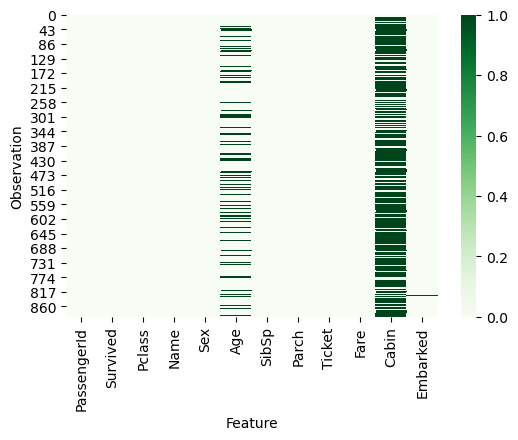

In [3]:
plt.figure(dpi=100)
sns.heatmap(mdata.isnull(), cmap="Greens")
plt.xlabel('Feature')
plt.ylabel('Observation')


<a class="anchor" id="DataLabeling"></a>
#### **Data Labeling**

In [4]:
def data_cleaner(data):
    data["Title"] = data["Name"].apply(lambda x: x[x.find(',') : x.find('.')][1:].strip())
    data["Title"] = data["Title"].apply(lambda x: 'Mr' if x == 'Mr' else x) # Mr
    data["Title"] = data["Title"].apply(lambda x: 'Miss' if x == 'Ms'or x == 'Mme' or x=='Mlle' else x) #Miss
    data["Title"] = data["Title"].apply(lambda x: 'Mrs' if x == 'Mrs' else x) #Mrs
    data["Title"] = data["Title"].apply(lambda x: 'Master' if x == 'Master' else x) #Master
    data["Title"] = data["Title"].apply(lambda x: 'Others' if x != 'Mr' and x != 'Miss' and x!= 'Mrs' and x!= 'Master' else x)

    data["Age_group"] = data["Age"].apply( lambda x: 'KIDs' if math.isnan(x)==False and x<=10 else x)
    data["Age_group"] = data["Age_group"].apply( lambda x: 'TEENs' if (type(x)!=str and math.isnan(x)==False and x<=20 and x >10) else x)
    data["Age_group"] = data["Age_group"].apply( lambda x: 'YOUNGs' if (type(x)!=str and math.isnan(x)==False and x<=40 and x >20) else x)
    data["Age_group"] = data["Age_group"].apply( lambda x: 'OLDs' if (type(x)!=str and math.isnan(x)==False and x >40) else x)
    
    data["FamSize"] = data["SibSp"]+data["Parch"]
    data["FamSizeLabel"] = data["FamSize"].apply( lambda x: 'Small' if int(x)<=2 else 'Large')

    return data

data_cleaner(mdata)
data_cleaner(tdata)
mdata.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,Age_group,FamSize,FamSizeLabel
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr,YOUNGs,1,Small
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs,YOUNGs,1,Small
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss,YOUNGs,0,Small
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs,YOUNGs,1,Small
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr,YOUNGs,0,Small


<a class="anchor" id="DataVisualization"></a>
#### **Data Visualization**

In [5]:
xcol = ["Age_group","Title", "Sex","Embarked", "Pclass","FamSizeLabel" ]
huecol = "Survived"
r = 3
c = 2
def mybar(data, xcol, huecol, r, c):
    i = -1
    sns.set_theme(style="ticks")
    f, ax = plt.subplots(r,c,figsize=(18, 7))
    sns.despine(f)
    for col in xcol:
        i+=1
        y = lambda y: int(0) if y<3 else int(1)
        x = lambda x: x if x<3 else int(x-3)
        sns.histplot( data, x=col, hue=huecol, multiple="stack", palette="light:m_r",
            edgecolor=".3", linewidth=.5, log_scale=False,ax = ax[x(i), y(i)])

<a class="anchor" id="ImputerDesign"></a>
#### **Imputer Design**

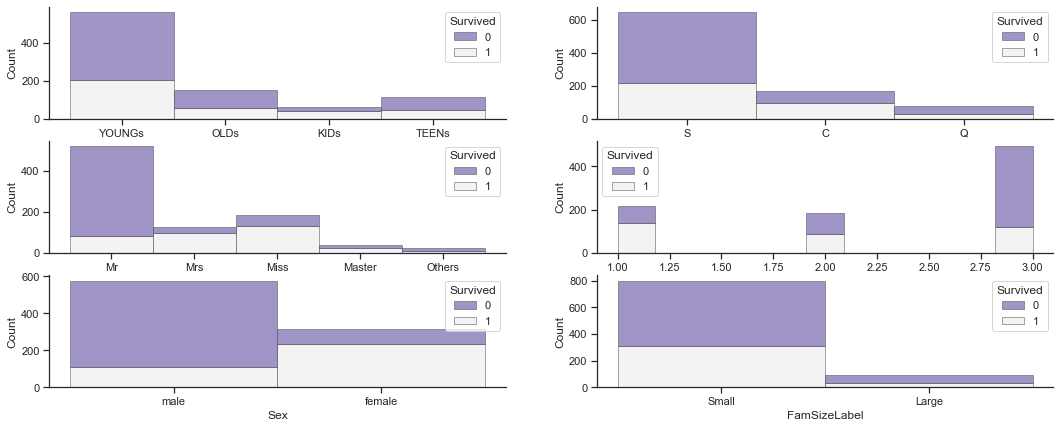

In [6]:
# # Imputers

Age_Imputer = SimpleImputer(strategy= 'most_frequent', missing_values=np.nan)
Age_Imputer.fit(mdata[['Age_group']])
mdata[['Age_group']] = Age_Imputer.transform(mdata[["Age_group"]])
Embarked_Imputer = SimpleImputer(strategy= 'most_frequent', missing_values=np.nan)
Embarked_Imputer.fit(mdata[['Embarked']])
mdata[['Embarked']] = Embarked_Imputer.transform(mdata[["Embarked"]])
mybar(mdata, xcol, huecol, r, c)

<a class="anchor" id="EncoderDesign"></a>
#### **Encoder Design**

In [7]:
# Encoding
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder(handle_unknown='ignore')
enc.fit(mdata[["Embarked"]])
mdata[["S","Q","C"]] = \
    pd.DataFrame(enc.transform(mdata[["Embarked"]]).toarray())
#----
enc.fit(mdata[["Sex"]])
mdata[["F","M"]] = \
    pd.DataFrame(enc.transform(mdata[["Sex"]]).toarray())
#----
#----
enc.fit(mdata[["Age_group"]])
mdata[["Age1","Age2","Age3","Age4"]] = \
    pd.DataFrame(enc.transform(mdata[["Age_group"]]).toarray())
#----
enc.fit(mdata[["FamSizeLabel"]])
mdata[["Small","Large"]] = \
    pd.DataFrame(enc.transform(mdata[["FamSizeLabel"]]).toarray())
#----
enc.fit(mdata[["Pclass"]])
mdata[["C1","C2","C3"]] = \
    pd.DataFrame(enc.transform(mdata[["Pclass"]]).toarray())
mdata.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,...,M,Age1,Age2,Age3,Age4,Small,Large,C1,C2,C3
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,...,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,...,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0


<a class="anchor" id="DropUselessFeatures"></a>
#### **Drop Useless Features**

In [73]:

col = ["Age","PassengerId","Sex","Name","Cabin","Ticket","Embarked","Title","FamSize","SibSp","Parch","Age_group","Pclass","FamSizeLabel"]
mdata_drp = mdata.drop(col,axis = 1)
tdata_drp = tdata.drop(col,axis = 1)
mdata_drp.describe()

,Survived,Fare,S,Q,C,F,M,Age1,Age2,Age3,Age4,Small,Large,C1,C2,C3
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,0.383838,32.204208,0.188552,0.086420,0.725028,0.352413,0.647587,0.071829,0.168350,0.129068,0.630752,0.102132,0.897868,0.242424,0.206510,0.551066
std,0.486592,49.693429,0.391372,0.281141,0.446751,0.477990,0.477990,0.258350,0.374387,0.335464,0.482872,0.302992,0.302992,0.428790,0.405028,0.497665
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,7.910400,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
50%,0.000000,14.454200,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000
75%,1.000000,31.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000
max,1.000000,512.329200,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


<a class="anchor" id="DimensionalityReduction"></a>
## **Dimensionality Reduction**

<a class="anchor" id="SensitivityAnalysis"></a>
#### **Sensitivity Analysis**

Text(0.0, 1.0, 'A')

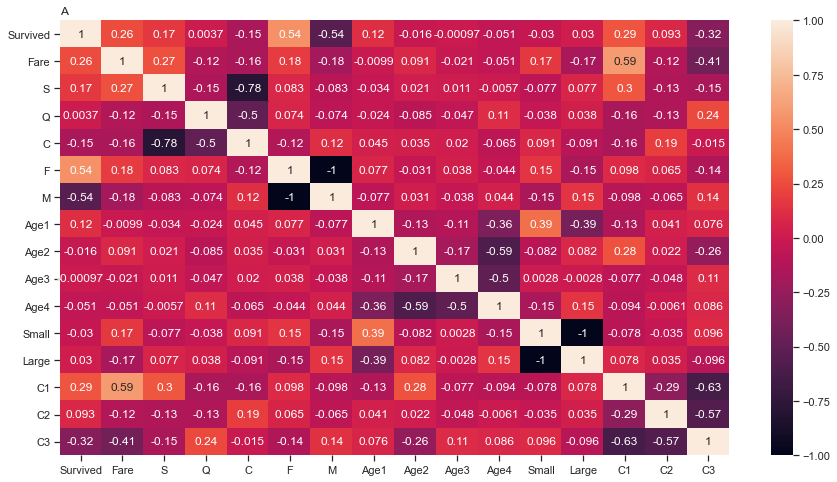

In [9]:
myheatmap=plt.figure(figsize=(15,8))
sns.heatmap(mdata_drp.corr(),annot=True)
plt.title("A",loc='left')

<a class="anchor" id="DecideonEffectiveFeatures"></a>
#### **Decide on Effective Features**

In [61]:
var_col =  ["Fare","S","C","F","M","Age1","Age2","Age4","Small","Large","C1","C2","C3"]
fit_col = "Survived"
mdata_drp[var_col].head()


,Fare,S,C,F,M,Age1,Age2,Age4,Small,Large,C1,C2,C3
0,7.2500,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
1,71.2833,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0
2,7.9250,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
3,53.1000,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0
4,8.0500,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0


<a class="anchor" id="UMAPAlgorithm"></a>
#### **UMAP Algorithm**
Uniform Manifold Approximation and Projection (UMAP) is a dimension reduction technique that can be used for visualisation similarly to t-SNE, but also for general non-linear dimension reduction.

Text(0, 0.5, 'Dim2')

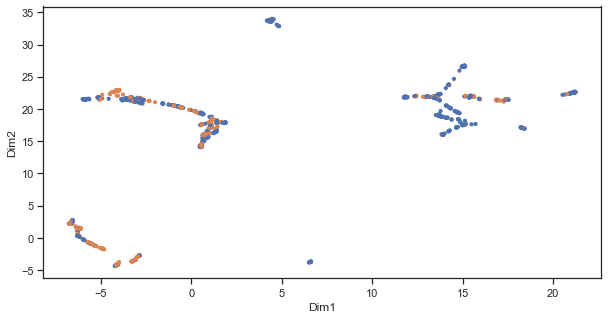

In [62]:
import umap
trans = umap.UMAP(n_neighbors=100, random_state=42).fit(mdata_drp[var_col])
plt.figure(figsize = (10,5))
plt.scatter(trans.embedding_[:, 0], trans.embedding_[:, 1], s= 10, c=[sns.color_palette()[x] for x in mdata_drp[fit_col]])
plt.xlabel("Dim1")
plt.ylabel("Dim2")

<a class="anchor" id="MachineLearning"></a>
## **Machine Learning**

<a class="anchor" id="Scaling"></a>
#### **Scaling**

In [70]:
y = mdata_drp[fit_col].values
y=np.reshape(y,(len(y),))
x_train, x_test, y_train, y_test = train_test_split(mdata_drp[var_col], y,
                                                    train_size=0.9,
                                                    random_state=0)
x_std_train = MinMaxScaler().fit_transform(x_train)
x_std_test = MinMaxScaler().fit_transform(x_test)

<a class="anchor" id="CrossValidationPrediction"></a>
#### **Cross Validation Prediction**

In [71]:
estimators = [svm.SVC(),
              ensemble.RandomForestClassifier(),
              KNeighborsClassifier(), SGDClassifier()]

def run_compare(estis, cv=3):
    for esti in estis:
        y_pred = cross_val_predict(esti, x_train,y_train, cv=cv)
        print(f"\nClassification Report for {esti}:")
        print("Accuracy= ", accuracy_score(y_pred, y_train))
        print(confusion_matrix(y_pred, y_train))
        print(classification_report(y_pred,y_train))
run_compare(estimators, cv=3)


Classification Report for SVC():
Accuracy=  0.6716604244694132
[[459 224]
 [ 39  79]]
              precision    recall  f1-score   support

           0       0.92      0.67      0.78       683
           1       0.26      0.67      0.38       118

    accuracy                           0.67       801
   macro avg       0.59      0.67      0.58       801
weighted avg       0.82      0.67      0.72       801


Classification Report for RandomForestClassifier():
Accuracy=  0.7740324594257179
[[415  98]
 [ 83 205]]
              precision    recall  f1-score   support

           0       0.83      0.81      0.82       513
           1       0.68      0.71      0.69       288

    accuracy                           0.77       801
   macro avg       0.75      0.76      0.76       801
weighted avg       0.78      0.77      0.78       801


Classification Report for KNeighborsClassifier():
Accuracy=  0.7503121098626716
[[407 109]
 [ 91 194]]
              precision    recall  f1-score   sup

<a class="anchor" id="TuningHyperParameters"></a>
#### **Tuning Hyper Parameters**

<a class="anchor" id="Pipeline"></a>
#### **Pipe Line Design**

<a class="anchor" id="Prediction"></a>
#### **Prediction**